# Lecture 04. Lasso and Ridge regression</center>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

We will work with a dataset of home prices in Boston (UCI repository)
Downloading data

In [2]:
boston = load_boston()
X, y = boston['data'], boston['target']

**Data description:**

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

**First 2 rows:**

In [5]:
X[:2]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00]])

## Lasso regression

Lasso regression solves the problem of minimizing the mean-squared error with L1 regularization:
$$ J(w) = \frac{1}{2} \sum_{i=1}^m {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

where $y = w^Tx$ – equation depending on model parameters $w$, $m$ - number of objects in the dataset $X$, $d$ – number of features, $y$ – target value, $\alpha$ – regularization coefficient.

**Train Lasso regression with a small coefficient $ \alpha $ (weak regularization). Only the coefficient at the NOX feature (concentration of nitrogen oxides) is decreased. This means that it is the least important for predicting the target attribute - the median value of houses in the area.**

In [4]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

**Train Lasso regression with $ \alpha = 10 $. Now, non-zero coefficients remained only with the fetaures ZN, TAX, B and LSTAT**

In [6]:
lasso = Lasso(alpha=10)
lasso.fit(X,y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

**Thus, Lasso regression serves as a method for feature selection**

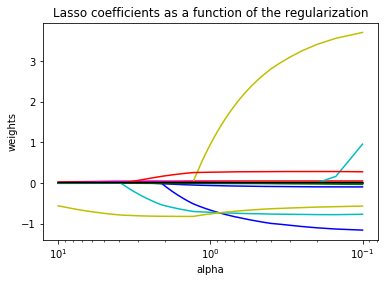

In [7]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                          ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

**Now we determine the best value of $ \alpha $ in the cross-validation process**

In [8]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([  0.1       ,   0.14974874,   0.19949749,   0.24924623,
         0.29899497,   0.34874372,   0.39849246,   0.44824121,
         0.49798995,   0.54773869,   0.59748744,   0.64723618,
         0.69698492,   0.74673367,   0.79648241,   0.84623116,
         0.8959799 ,   0.94572864,   0.99547739,   1.04522613,
         1.09497487,   1.14472362,   1.19447236,   1.24422111,
         1.29396985,   1.34371859,   1.39346734,   1.44321608,
         1.49296482,   1.54271357,   1.5924...
         9.25376884,   9.30351759,   9.35326633,   9.40301508,
         9.45276382,   9.50251256,   9.55226131,   9.60201005,
         9.65175879,   9.70150754,   9.75125628,   9.80100503,
         9.85075377,   9.90050251,   9.95025126,  10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [9]:
lasso_cv.coef_

array([-0.09739888,  0.04946381, -0.02749478,  0.16060406, -0.        ,
        3.55971374, -0.00726968, -1.13393157,  0.28096773, -0.01503453,
       -0.77985441,  0.01025033, -0.58259584])

In [10]:
lasso_cv.alpha_

0.14974874371859298

**The `cross_val_score` method maximizes the metric, so instead of
minimize MSE we will maximize the negative MSE - `neg_mean_squared_error`**

In [11]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                scoring='neg_mean_squared_error')

array([-16.89312641, -37.56646167, -72.42092752])

**To nevertheless interpret the result in terms of MSE, we output the module of the mean value of the metric `neg_mean_squared_error` in cross-validation**

In [12]:
abs(np.mean(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                        scoring='neg_mean_squared_error')))

42.293505199150765

In [13]:
abs(np.mean(cross_val_score(Lasso(9.95), X, y, cv=3 , scoring='neg_mean_squared_error')))

53.722660877158468

**Another ambiguous point: LassoCV sorts the parameter values in descending order - it’s easier to optimize. Because of this, it might seem that optimizing the $ \alpha $ parameter is not working properly**

In [14]:
lasso_cv.alphas[:10] # значения параметров на входе

array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869])

In [15]:
lasso_cv.alphas_[:10] # преобразованные значения параметров

array([ 10.        ,   9.95025126,   9.90050251,   9.85075377,
         9.80100503,   9.75125628,   9.70150754,   9.65175879,
         9.60201005,   9.55226131])

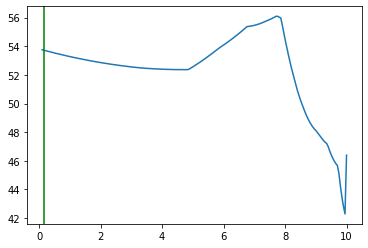

In [16]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1)) # неверно
plt.axvline(lasso_cv.alpha_, c='g');

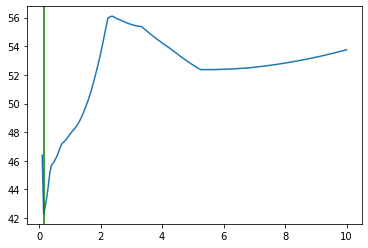

In [17]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1)) # верно
plt.axvline(lasso_cv.alpha_, c='g');

## Ridge regression

Ridge regression (or ridge regression) solves the problem of minimizing the mean-squared error with L2 regularization:
$$ J(w) = \frac{1}{2} \sum_{i=1}^m {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

where $y = w^Tx$ – hyperplane equation depending on model parameters $w$, $m$ - dataset size $X$, $d$ – number of features, $y$ – target variable, $\alpha$ – regularizatino coefficient.

In [18]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [19]:
ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([  1.00000000e-02,   1.09698580e-02,   1.20337784e-02,
         1.32008840e-02,   1.44811823e-02,   1.58856513e-02,
         1.74263339e-02,   1.91164408e-02,   2.09704640e-02,
         2.30043012e-02,   2.52353917e-02,   2.76828663e-02,
         3.03677112e-02,   3.33129479e-02,   3.65438307e-02,
         4.00880633e-02,   4.39760361e-02,   4.82410870e-02,
         5.29197874e-02,   5.80522552e-02,   6.36824994e-02,
         6.98587975e-0...
         2.27396575e+05,   2.49450814e+05,   2.73644000e+05,
         3.00183581e+05,   3.29297126e+05,   3.61234270e+05,
         3.96268864e+05,   4.34701316e+05,   4.76861170e+05,
         5.23109931e+05,   5.73844165e+05,   6.29498899e+05,
         6.90551352e+05,   7.57525026e+05,   8.30994195e+05,
         9.11588830e+05,   1.00000000e+06]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [20]:
ridge_cv.alpha_

264.30814869741084

**В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.**

In [21]:
ridge_cv.coef_

array([-0.09975818,  0.05562804, -0.05006572,  0.30202744, -0.09151777,
        1.42295311,  0.01289136, -0.99866364,  0.33080392, -0.01661515,
       -0.81984784,  0.00876309, -0.72318342])

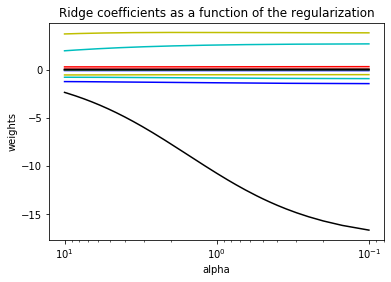

In [22]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
ax.set_prop_cycle(cycler('color', 
                         ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Links
- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html) Generalized Linear Models Scikit-learn
- [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV), [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) и [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) в Scikit-learn


Author: [Yury Kashnitskiy](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Nerses Bagiyan](https://www.linkedin.com/in/nersesbagiyan/), [Yulia Klimushina](https://www.linkedin.com/in/yuliya-klimushina-7168a9139), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.